## 구글드라이브 연동

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 라이브러리 불러오기

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## 한글폰트 적용

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

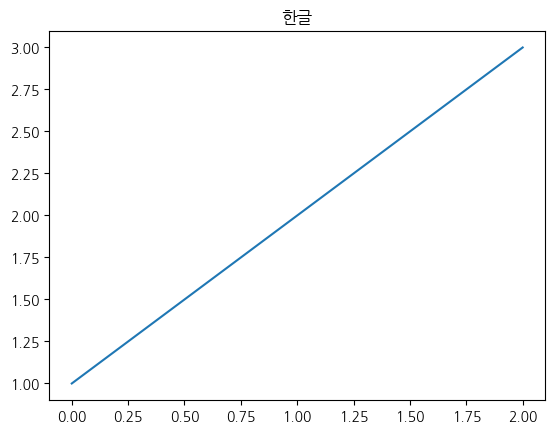

In [4]:
plt.rcParams['font.family'] = 'NanumGothic' # 나눔바른고딕 적용하기
plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

### 파일 불러오기

In [19]:
def process_subway_data(line_number):
    # 파일 경로 생성
    file_path = f'/content/drive/MyDrive/멀캠 자료/호선별데이터/은채님{line_number}호선.csv'

    # 데이터 불러오기
    data = pd.read_csv(file_path)

    # 2022년 데이터 필터링
    data_2022 = data[data['YEAR'] == 2022]

    # 요일별 상선, 하선 평균 혼잡도 계산
    avg_congestion_by_day_up = data_2022[data_2022['DIRECTION'] == '상선'].groupby('DAY')[['TIME_05', 'TIME_06', 'TIME_07', 'TIME_08', 'TIME_09', 'TIME_10', 'TIME_11', 'TIME_12', 'TIME_13', 'TIME_14', 'TIME_15', 'TIME_16', 'TIME_17', 'TIME_18', 'TIME_19', 'TIME_20', 'TIME_21', 'TIME_22', 'TIME_23', 'TIME_00']].mean()
    avg_congestion_by_day_down = data_2022[data_2022['DIRECTION'] == '하선'].groupby('DAY')[['TIME_05', 'TIME_06', 'TIME_07', 'TIME_08', 'TIME_09', 'TIME_10', 'TIME_11', 'TIME_12', 'TIME_13', 'TIME_14', 'TIME_15', 'TIME_16', 'TIME_17', 'TIME_18', 'TIME_19', 'TIME_20', 'TIME_21', 'TIME_22', 'TIME_23', 'TIME_00']].mean()

    # 웹에서 사용할 데이터 구조 생성
    days_of_week = ['월', '화', '수', '목', '금', '토', '일']
    data_for_web = []

    for day_idx, day in enumerate(days_of_week):
        data_entry = {
            'name': day,
            'y_up': avg_congestion_by_day_up.iloc[day_idx].mean(),  # 상선의 평균 혼잡도
            'y_down': avg_congestion_by_day_down.iloc[day_idx].mean()  # 하선의 평균 혼잡도
        }
        data_for_web.append(data_entry)

    return data_for_web

In [6]:
# 1호선부터 8호선까지의 데이터 처리
for i in range(1, 9):
    data_for_web = process_subway_data(i)

    # 결과 출력
    print(f'Line {i} 데이터:')
    for entry in data_for_web:
        print(entry)
    print('\n')

Line 1 데이터:
{'name': '월', 'y_up': 29.653645833333336, 'y_down': 30.812083333333334}
{'name': '화', 'y_up': 28.53404166666666, 'y_down': 29.638979166666672}
{'name': '수', 'y_up': 28.506999999999998, 'y_down': 29.60902083333333}
{'name': '목', 'y_up': 27.382874999999995, 'y_down': 28.4416875}
{'name': '금', 'y_up': 11.785666666666666, 'y_down': 12.44375}
{'name': '토', 'y_up': 22.396875, 'y_down': 23.8820625}
{'name': '일', 'y_up': 28.299354166666667, 'y_down': 29.39666666666667}


Line 2 데이터:
{'name': '월', 'y_up': 42.851551870748295, 'y_down': 42.451245748299314}
{'name': '화', 'y_up': 41.847674319727886, 'y_down': 41.451079931972785}
{'name': '수', 'y_up': 42.082074829931976, 'y_down': 41.6793962585034}
{'name': '목', 'y_up': 40.11758078231292, 'y_down': 39.71788265306123}
{'name': '금', 'y_up': 11.9504, 'y_down': 12.165945833333334}
{'name': '토', 'y_up': 25.82510416666667, 'y_down': 26.424754166666666}
{'name': '일', 'y_up': 41.60121598639456, 'y_down': 41.210505952380956}


Line 3 데이터:
{'name'

## 특정 역 선택시 시간대별 혼잡도(파이차트)

<ipython-input-34-0ffe8f3cd4cc>:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_congestion_by_day_up = data_up.groupby('DAY').mean()
<ipython-input-34-0ffe8f3cd4cc>:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_congestion_by_day_down = data_down.groupby('DAY').mean()


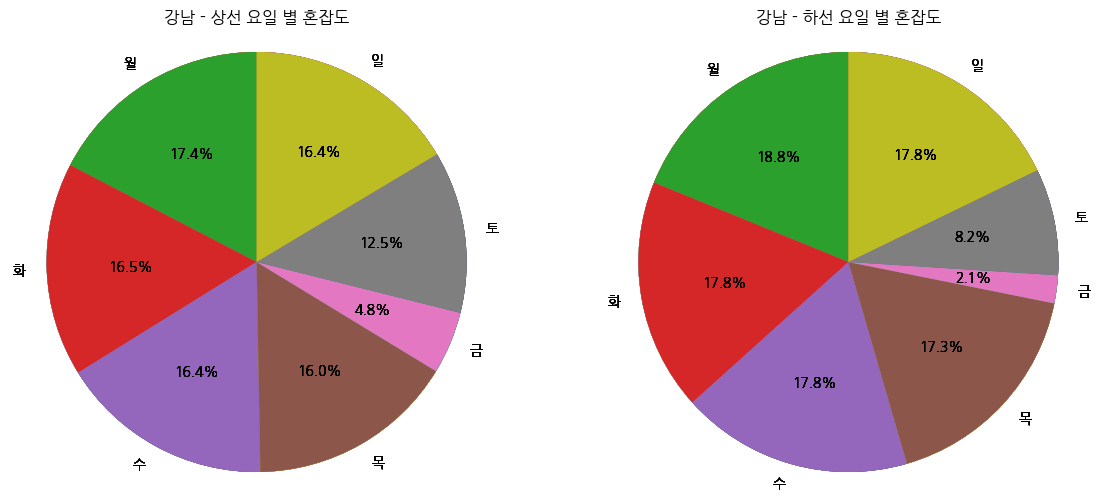

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

def create_congestion_pie_chart(line_number, selected_station):
    # 파일 경로 생성
    file_path = f'/content/drive/MyDrive/세미 프로젝트/data/은채님{line_number}호선.csv'

    try:
        # 데이터 불러오기
        data = pd.read_csv(file_path)

        # 2022년 데이터 필터링
        data_2022 = data[data['YEAR'] == 2022]

        # 선택한 역에 대한 데이터 필터링
        data_selected_station = data_2022[data_2022['STATION'] == selected_station]

        if data_selected_station.empty:
            print(f"선택한 역 ({selected_station})에 대한 데이터가 없습니다.")
            return

        # 상선과 하선 데이터 분리
        data_up = data_selected_station[data_selected_station['DIRECTION'] == '상선']
        data_down = data_selected_station[data_selected_station['DIRECTION'] == '하선']

        # 요일을 숫자로 매핑
        days_mapping = {'월': 0, '화': 1, '수': 2, '목': 3, '금': 4, '토': 5, '일': 6}

        # 요일별 평균 혼잡도 계산
        avg_congestion_by_day_up = data_up.groupby('DAY').mean()
        avg_congestion_by_day_down = data_down.groupby('DAY').mean()

        # 웹에서 사용할 데이터 구조 생성
        days_of_week = ['월', '화', '수', '목', '금', '토', '일']
        data_for_web_up = []
        data_for_web_down = []

        for day in days_of_week:
            data_entry_up = {
                'name': day,
                'y': avg_congestion_by_day_up['TIME_05'].values.tolist()  # 아무 시간대나 선택하여 사용
            }
            data_for_web_up.append(data_entry_up)

            data_entry_down = {
                'name': day,
                'y': avg_congestion_by_day_down['TIME_05'].values.tolist()  # 아무 시간대나 선택하여 사용
            }
            data_for_web_down.append(data_entry_down)

        # 파이 차트 생성 (상선)
        plt.figure(figsize=(14, 6))
        plt.subplot(121)  # 1x2 그리드 중 첫 번째 영역 (상선)
        for entry in data_for_web_up:
            plt.pie(entry['y'], labels=days_of_week, autopct='%1.1f%%', startangle=90)
            plt.title(f'{selected_station} - 상선 요일 별 혼잡도')
            plt.axis('equal')  # 원의 형태 유지

        # 파이 차트 생성 (하선)
        plt.subplot(122)  # 1x2 그리드 중 두 번째 영역 (하선)
        for entry in data_for_web_down:
            plt.pie(entry['y'], labels=days_of_week, autopct='%1.1f%%', startangle=90)
            plt.title(f'{selected_station} - 하선 요일 별 혼잡도')
            plt.axis('equal')  # 원의 형태 유지

        # 차트 표시
        plt.show()

    except FileNotFoundError:
        print(f"데이터 파일을 찾을 수 없습니다. 파일 경로를 확인하세요.")
    except Exception as e:
        print(f"오류 발생: {e}")

# 호선 번호와 선택한 역 이름을 지정하여 함수 호출 (원하는 호선 번호와 역 이름을 설정하세요)
line_number = 2  # 원하는 호선 번호로 설정
selected_station = '강남'  # 원하는 역 이름으로 설정
create_congestion_pie_chart(line_number, selected_station)

## 특정 역 선택시 시간대별 혼잡도(선 그래프)



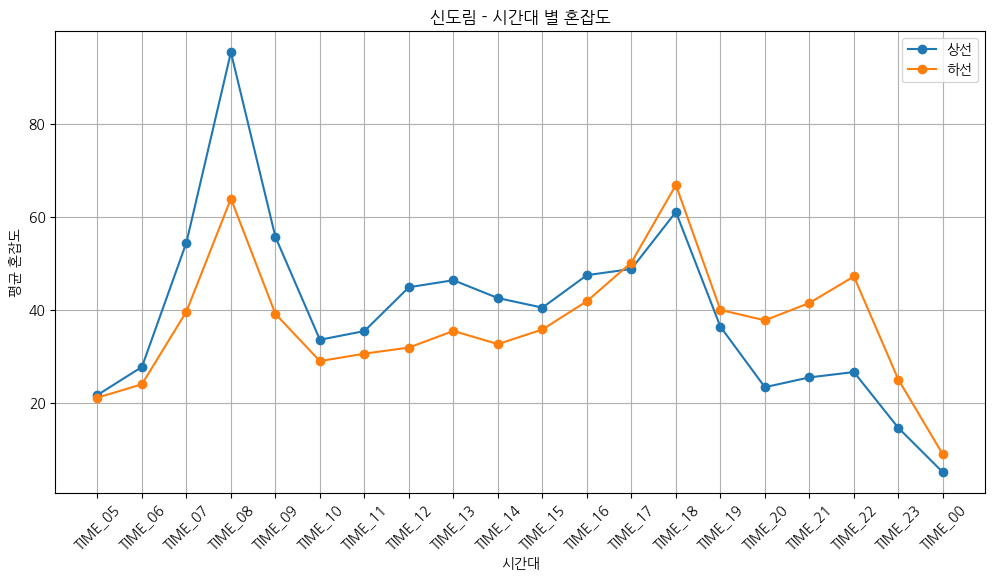

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

def create_congestion_line_chart(line_number, selected_station):
    # 파일 경로 생성
    file_path = f'/content/drive/MyDrive/세미 프로젝트/data/은채님{line_number}호선.csv'

    try:
        # 데이터 불러오기
        data = pd.read_csv(file_path)

        # 2022년 데이터 필터링
        data_2022 = data[data['YEAR'] == 2022]

        # 선택한 역에 대한 데이터 필터링
        data_selected_station = data_2022[data_2022['STATION'] == selected_station]

        if data_selected_station.empty:
            print(f"선택한 역 ({selected_station})에 대한 데이터가 없습니다.")
            return

        # 상선과 하선 데이터 분리
        data_up = data_selected_station[data_selected_station['DIRECTION'] == '상선']
        data_down = data_selected_station[data_selected_station['DIRECTION'] == '하선']

        # 시간대 리스트 생성
        time_labels = [f'TIME_{i:02d}' for i in range(5, 24)] + ['TIME_00']

        # 상선 혼잡도 리스트 생성
        congestion_up = data_up[time_labels].mean()

        # 하선 혼잡도 리스트 생성
        congestion_down = data_down[time_labels].mean()

        # 시간대에 따른 혼잡도 선 그래프 생성
        plt.figure(figsize=(12, 6))
        plt.plot(time_labels, congestion_up, label='상선', marker='o')
        plt.plot(time_labels, congestion_down, label='하선', marker='o')
        plt.xlabel('시간대')
        plt.ylabel('평균 혼잡도')
        plt.title(f'{selected_station} - 시간대 별 혼잡도')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()

    except FileNotFoundError:
        print(f"데이터 파일을 찾을 수 없습니다. 파일 경로를 확인하세요.")
    except Exception as e:
        print(f"오류 발생: {e}")

# 호선 번호와 선택한 역 이름을 지정하여 함수 호출 (원하는 호선 번호와 역 이름을 설정하세요)
line_number = 2  # 원하는 호선 번호로 설정
selected_station = '신도림'  # 원하는 역 이름으로 설정
create_congestion_line_chart(line_number, selected_station)